In [10]:
# !pip3 install yfinance
!pip3 install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.7 MB/s eta 0:00:00


In [26]:
import pandas as pd
import yfinance as yf

from pprint import pprint

# Data Import

Download daily price data for a basket of ETFs and all underlying stocks within the ETFs.

In [19]:
# 1 billion + market cap
# US listed ETFs
# focused on EM

# large cap US equity ETFs (>24 Bn Market Cap)
etf_ticker_names = [
  'SPY',
  'IVV',
  'VOO',
  'VTI',
  'QQQ',
  'VTV',
  'VUG',
  'VIG',
  'IWF',
  'IWD',
  'VYM',
  'SCHD',
  'VGT',
  'XLK',
  'ITOT',
  'XLV',
  'XLE',
  'XLF',
  'SCHX',
  'USMV',
  'IVW',
  'IWB',
  'IVE',
  'VV',
  'DGRO'
]
print(f'{len(etf_ticker_names)} ETFs selected')

25 ETFs selected


In [20]:
start_date = '2017-01-01'
end_date = '2022-12-31'

In [21]:
etf_ticker_str = ' '.join(etf_ticker_names)
etf_data = yf.download(etf_ticker_names, start=start_date, end=end_date)

[*********************100%***********************]  25 of 25 completed


In [22]:
type(etf_data)

pandas.core.frame.DataFrame

In [23]:
etf_data.head()

Adj Close                                    \
                                DGRO       ITOT        IVE         IVV   
Date                                                                     
2017-01-03 00:00:00-05:00  25.245335  46.615772  88.951256  203.194946   
2017-01-04 00:00:00-05:00  25.375648  46.967278  89.490845  204.423538   
2017-01-05 00:00:00-05:00  25.297466  46.895172  89.134033  204.235214   
2017-01-06 00:00:00-05:00  25.381731  47.057423  89.325485  205.042328   
2017-01-09 00:00:00-05:00  25.288774  46.886162  88.698883  204.378693   

                                                                         \
                                 IVW         IWB        IWD         IWF   
Date                                                                      
2017-01-03 00:00:00-05:00  28.676376  113.637810  98.459999   99.829094   
2017-01-04 00:00:00-05:00  28.861105  114.398781  99.114510  100.603638   
2017-01-05 00:00:00-05:00  28.912552  114.299133  98.721809  100.764191   
2017-01-06 00:00:00-05:00  29.090277  114.761139  98.861435  101.415955   
2017-01-09 00:00:00-05:00  29.069227  114.317245  98.198219  101.406471   

                                                  ...   Volume           \
                                  QQQ       SCHD  ...      VOO      VTI   
Date                                              ...                     
2017-01-03 00:00:00-05:00  114.449112  36.166050  ...  4750200  2731600   
2017-01-04 00:00:00-05:00  115.071457  36.223839  ...  4622400  3228700   
2017-01-05 00:00:00-05:00  115.722473  36.190815  ...  2772100  2604000   
2017-01-06 00:00:00-05:00  116.737335  36.190815  ...  2194600  2317600   
2017-01-09 00:00:00-05:00  117.120300  36.000896  ...  1705200  2461400   

                                                                        \
                               VTV      VUG      VV      VYM       XLE   
Date                                                                     
2017-01-03 00:00:00-05:00  1952000   874000  412700  2994500  24623100   
2017-01-04 00:00:00-05:00  1733400   605000  256200  1690800  11185500   
2017-01-05 00:00:00-05:00  1528500   850600  232600  1336900  11141200   
2017-01-06 00:00:00-05:00  1409700  1062000  265500  1226600   7410500   
2017-01-09 00:00:00-05:00  1149200   756100  187700  2535300  10960900   

                                                         
                                XLF       XLK       XLV  
Date                                                     
2017-01-03 00:00:00-05:00  71259900  13940600  11792900  
2017-01-04 00:00:00-05:00  45092200   7223100   9174500  
2017-01-05 00:00:00-05:00  62201100   5502900   5979300  
2017-01-06 00:00:00-05:00  38060800   8750600   5769300  
2017-01-09 00:00:00-05:00  34022400   8313500   5751900  

[5 rows x 150 columns]

In [24]:
categories = set()
for col in etf_data.columns:
  categories.add(col[0])
categories

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [25]:
etf_tickers = [yf.Ticker(x) for x in etf_ticker_names]

In [17]:
spy_ticker = yf.Ticker('SPY')

In [35]:
pd.set_option('max_rows', 100)
df = pd.DataFrame.from_dict(spy_ticker.info.items())
df

,0,1
0,shortName,SPDR S&P 500
1,longName,SPDR S&P 500 ETF Trust
2,isEsgPopulated,False
3,gmtOffSetMilliseconds,-18000000
4,quoteType,ETF
5,messageBoardId,finmb_6160262
6,market,us_market
7,annualHoldingsTurnover,None
8,enterpriseToRevenue,None
9,beta3Year,1


In [37]:
pprint(spy_ticker.info['holdings'])

[{'holdingName': 'Apple Inc', 'holdingPercent': 0.059, 'symbol': 'AAPL'},
 {'holdingName': 'Microsoft Corp',
  'holdingPercent': 0.055999998,
  'symbol': 'MSFT'},
 {'holdingName': 'Amazon.com Inc', 'holdingPercent': 0.0405, 'symbol': 'AMZN'},
 {'holdingName': 'Facebook Inc A', 'holdingPercent': 0.0229, 'symbol': 'FB'},
 {'holdingName': 'Alphabet Inc A', 'holdingPercent': 0.0202, 'symbol': 'GOOGL'},
 {'holdingName': 'Alphabet Inc Class C',
  'holdingPercent': 0.0196,
  'symbol': 'GOOG'},
 {'holdingName': 'Berkshire Hathaway Inc Class B',
  'holdingPercent': 0.0145000005,
  'symbol': 'BRK.B'},
 {'holdingName': 'Tesla Inc', 'holdingPercent': 0.014400001, 'symbol': 'TSLA'},
 {'holdingName': 'NVIDIA Corp', 'holdingPercent': 0.0137, 'symbol': 'NVDA'},
 {'holdingName': 'JPMorgan Chase & Co',
  'holdingPercent': 0.0128999995,
  'symbol': 'JPM'}]


In [51]:
# data sourced from
# https://www.slickcharts.com/sp500

path = '/home/Data/SP 500 Holdings.csv'

spy_holdings_df = pd.read_csv(path)
spy_holdings_df.head()

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,1,Apple Inc.,AAPL,6.444584,152.74,-1.76,(-1.14%)
1,2,Microsoft Corporation,MSFT,5.636321,255.03,-3.32,(-1.29%)
2,3,Amazon.com Inc.,AMZN,2.863597,102.14,-1.25,(-1.21%)
3,4,Alphabet Inc. Class A,GOOGL,1.838907,103.40,-1.38,(-1.32%)
4,5,Alphabet Inc. Class C,GOOG,1.646146,103.69,-1.53,(-1.45%)


In [56]:
# download price data for each constituent holding
spy_holdings = {}
for symbol in spy_holdings_df['Symbol']:
  spy_holdings[symbol] = {}
  spy_holdings[symbol]['ticker'] = yf.Ticker(symbol)

In [41]:
spy_price = etf_data[('Adj Close', 'SPY')]
spy_price.head()

Date
2017-01-03 00:00:00-05:00    202.856522
2017-01-04 00:00:00-05:00    204.063370
2017-01-05 00:00:00-05:00    203.901260
2017-01-06 00:00:00-05:00    204.630753
2017-01-09 00:00:00-05:00    203.955292
Name: (Adj Close, SPY), dtype: float64

In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.stats

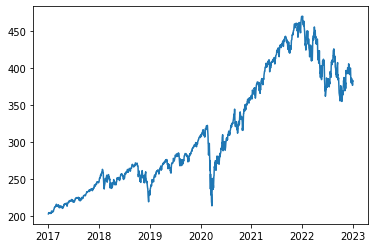

In [81]:
plt.plot(spy_price)

In [67]:
# get prices for each of the underlying securities
for symbol in spy_holdings.keys():
  spy_holdings[symbol]['history'] = spy_holdings[symbol]['ticker'].history(
      start=start_date,
      end=end_date
      )

Got error from yahoo api for ticker BRK.B, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BRK.B: No timezone found, symbol may be delisted
BF.B: No data found for this date range, symbol may be delisted


In [58]:
aapl = yf.Ticker('AAPL')

In [60]:
aapl.history(period='1mo').head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-04 00:00:00-05:00,126.889999,128.660004,125.080002,126.360001,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,127.129997,127.769997,124.760002,125.019997,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,126.010002,130.289993,124.889999,129.619995,87686600,0.0,0.0
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,70790800,0.0,0.0
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,63896200,0.0,0.0


In [74]:
# build df containing prices for SPY and all constituents for the 6 year period

spy_df = pd.DataFrame()
spy_df.loc[:, 'SPY'] = spy_price
spy_df.head()

,SPY
Date,
2017-01-03 00:00:00-05:00,202.856522
2017-01-04 00:00:00-05:00,204.063370
2017-01-05 00:00:00-05:00,203.901260
2017-01-06 00:00:00-05:00,204.630753
2017-01-09 00:00:00-05:00,203.955292


In [77]:
for symbol in spy_holdings.keys():
  spy_df.loc[:, symbol] = spy_holdings[symbol]['history']['Close']

spy_df.dropna(axis=0, how='all', inplace=True)
spy_df.dropna(axis=1, how='all', inplace=True)

spy_df.head()

,SPY,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,TSLA,XOM,UNH,...,ALK,MHK,NWL,LNC,RL,LUMN,FOX,DVA,DISH,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00-05:00,202.856522,27.174759,57.645386,37.683498,40.400501,39.306999,25.147223,14.466000,67.322113,147.823502,...,82.679207,201.750000,34.716057,56.050213,79.940659,14.724646,NaN,65.089996,59.689999,11.141815
2017-01-04 00:00:00-05:00,204.063370,27.144341,57.387447,37.859001,40.388500,39.345001,25.733929,15.132667,66.581383,148.244629,...,83.787849,205.880005,35.944874,56.762253,79.931839,14.800159,NaN,66.309998,60.389999,11.326740
2017-01-05 00:00:00-05:00,203.901260,27.282377,57.387447,39.022499,40.651001,39.701000,25.080664,15.116667,65.588867,148.491852,...,82.453720,204.350006,36.076252,55.974808,78.547028,14.811776,NaN,65.709999,60.759998,11.326740
2017-01-06 00:00:00-05:00,204.630753,27.586527,57.884869,39.799500,41.260502,40.307499,25.415920,15.267333,65.551826,148.702438,...,81.720879,204.440002,36.215370,56.664719,78.132454,14.742072,NaN,65.790001,61.360001,11.326740
2017-01-09 00:00:00-05:00,203.955292,27.839211,57.700634,39.846001,41.359001,40.332500,26.446369,15.418667,64.470398,148.281265,...,82.181252,203.729996,36.277199,55.966389,76.959328,14.654943,NaN,63.380001,61.639999,11.465436


In [78]:
spy_df.shape

(1510, 502)

In [83]:
# build df containing weighted prices according to holding weight
spy_weighted_df = pd.DataFrame(spy_df['SPY'])
spy_weighted_df.head()

,SPY
Date,
2017-01-03 00:00:00-05:00,202.856522
2017-01-04 00:00:00-05:00,204.063370
2017-01-05 00:00:00-05:00,203.901260
2017-01-06 00:00:00-05:00,204.630753
2017-01-09 00:00:00-05:00,203.955292


In [98]:
for col in spy_df.columns:
  if col != 'SPY':
    weight = spy_holdings_df[spy_holdings_df['Symbol'] == col]['Weight']
    spy_weighted_df.loc[:, col] = spy_df[col] * float(weight/100)

spy_weighted_df.tail()

,SPY,SPY NAV,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,TSLA,XOM,...,ALK,MHK,NWL,LNC,RL,LUMN,FOX,DVA,DISH,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23 00:00:00-05:00,382.910004,182.656244,8.497829,13.455589,2.441216,1.640857,1.478404,2.351383,1.778290,1.421557,...,0.008190,0.018303,0.002298,0.004731,0.016065,0.000766,0.003942,0.010039,0.001586,0.001401
2022-12-27 00:00:00-05:00,381.399994,181.987114,8.379892,13.355827,2.377931,1.607021,1.447456,2.183604,1.575407,1.441308,...,0.007992,0.018350,0.002307,0.004677,0.016046,0.000772,0.003916,0.010059,0.001558,0.001401
2022-12-28 00:00:00-05:00,376.660004,179.992035,8.122754,13.218864,2.342995,1.581828,1.423258,2.170460,1.627536,1.417633,...,0.007810,0.018004,0.002286,0.004637,0.015763,0.000744,0.003847,0.009909,0.001481,0.001374
2022-12-29 00:00:00-05:00,383.440002,183.235703,8.352825,13.584097,2.410576,1.626513,1.464247,2.258138,1.759084,1.428359,...,0.008096,0.019067,0.002325,0.004812,0.016233,0.000775,0.003905,0.010237,0.001549,0.001393
2022-12-30 00:00:00-05:00,382.429993,182.669258,8.373448,13.517025,2.405421,1.622468,1.460625,2.259839,1.778723,1.442747,...,0.008120,0.019099,0.002314,0.004823,0.016386,0.000763,0.003888,0.010163,0.001540,0.001392


In [96]:
spy_nav = spy_weighted_df.sum(axis=1) - spy_weighted_df['SPY']
spy_weighted_df.insert(loc=1, column='SPY NAV', value=spy_nav)
spy_weighted_df.head()

,SPY,SPY NAV,AAPL,MSFT,AMZN,GOOGL,GOOG,NVDA,TSLA,XOM,...,ALK,MHK,NWL,LNC,RL,LUMN,FOX,DVA,DISH,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00-05:00,202.856522,74.006855,1.751300,3.249079,1.079104,0.742928,0.647051,0.388865,0.208889,0.880587,...,0.015635,0.037695,0.006142,0.008927,0.012396,0.002153,NaN,0.008859,0.006549,0.000841
2017-01-04 00:00:00-05:00,204.063370,74.488897,1.749340,3.234541,1.084129,0.742707,0.647676,0.397937,0.218516,0.870898,...,0.015845,0.038467,0.006359,0.009040,0.012395,0.002164,NaN,0.009025,0.006625,0.000855
2017-01-05 00:00:00-05:00,203.901260,74.555685,1.758236,3.234541,1.117447,0.747534,0.653536,0.387835,0.218285,0.857916,...,0.015593,0.038181,0.006383,0.008915,0.012180,0.002166,NaN,0.008944,0.006666,0.000855
2017-01-06 00:00:00-05:00,204.630753,74.957823,1.777837,3.262577,1.139697,0.758742,0.663520,0.393020,0.220461,0.857432,...,0.015454,0.038198,0.006407,0.009024,0.012116,0.002155,NaN,0.008955,0.006732,0.000855
2017-01-09 00:00:00-05:00,203.955292,74.822918,1.794121,3.252193,1.141029,0.760554,0.663932,0.408954,0.222646,0.843286,...,0.015541,0.038065,0.006418,0.008913,0.011934,0.002143,NaN,0.008627,0.006763,0.000865


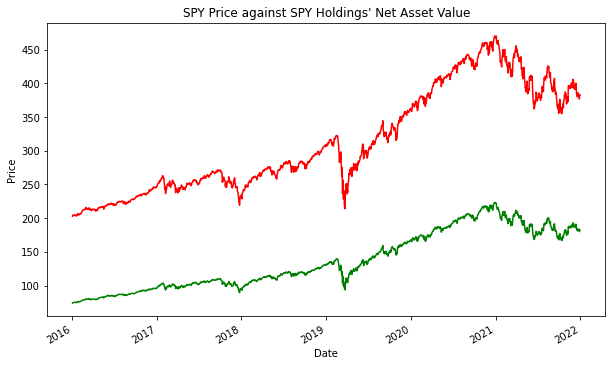

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
spy_weighted_df['SPY'].plot(ax=ax, color='red', label='SPY')
spy_weighted_df['SPY NAV'].plot(ax=ax, color='green', label='SPY NAV')

ax.set_ylabel('Price')
plt.title("SPY Price against SPY Holdings' Net Asset Value")
plt.show()

We first calculate the RSI indicator for SPY, and attempt to use that to build trading signals for SPY.

In [145]:
spy_rsi_df = pd.DataFrame(spy_df['SPY'])
spy_rsi_df.head()

,SPY
Date,
2017-01-03 00:00:00-05:00,202.856522
2017-01-04 00:00:00-05:00,204.063370
2017-01-05 00:00:00-05:00,203.901260
2017-01-06 00:00:00-05:00,204.630753
2017-01-09 00:00:00-05:00,203.955292


In [146]:
import numpy as np

In [151]:
# RSI calculations used from https://medium.com/analytics-vidhya/momentum-trading-with-macd-and-rsi-yfinance-python-e5203d2e1a8a

def calculate_rsi(prices: pd.Series) -> pd.DataFrame:
  df = pd.DataFrame(prices)
  col = df.columns[0]

  df['Up Move'] = np.nan
  df['Down Move'] = np.nan
  df['Average Up'] = np.nan
  df['Average Down'] = np.nan
  df['RS'] = np.nan
  df['RSI'] = np.nan

  for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0

    if df[col][x] > df[col][x-1]:
      df['Up Move'][x] = df[col][x] - df[col][x-1]

    if df[col][x] < df[col][x-1]:
      df['Down Move'][x] = abs(df[col][x] - df[col][x-1])

  df['Average Up'][14] = df['Up Move'][1:15].mean()
  df['Average Down'][14] = df['Down Move'][1:15].mean()
  df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
  df['RSI'][14] = 100 - (100/(1+df['RS'][14]))

  for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13 + df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13 + df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))

  return df


In [152]:
spy_rsi_df = calculate_rsi(spy_df['SPY'])
spy_rsi_df.head()

,SPY,Up Move,Down Move,Average Up,Average Down,RS,RSI
Date,,,,,,,
2017-01-03 00:00:00-05:00,202.856522,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00-05:00,204.063370,1.206848,0.000000,NaN,NaN,NaN,NaN
2017-01-05 00:00:00-05:00,203.901260,0.000000,0.162109,NaN,NaN,NaN,NaN
2017-01-06 00:00:00-05:00,204.630753,0.729492,0.000000,NaN,NaN,NaN,NaN
2017-01-09 00:00:00-05:00,203.955292,0.000000,0.675461,NaN,NaN,NaN,NaN


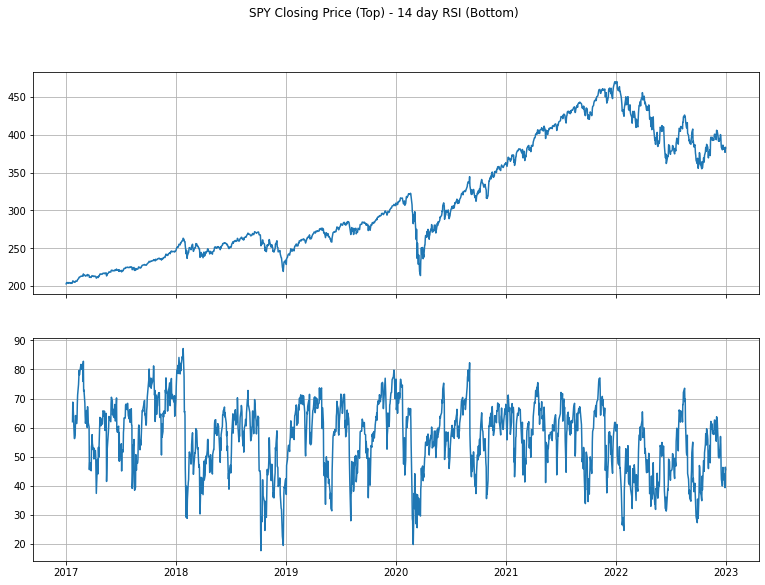

In [155]:
fig, axes = plt.subplots(2, sharex=True, figsize=(13, 9))
fig.suptitle('SPY Closing Price (Top) - 14 day RSI (Bottom)')

axes[0].plot(spy_rsi_df['SPY'])
axes[1].plot(spy_rsi_df['RSI'])
axes[0].grid()
axes[1].grid()

In [165]:
def get_strategy_from_rsi(input: pd.DataFrame) -> pd.DataFrame:
  # first column assumed to be prices
  df = pd.DataFrame(input)
  price_col = df.columns[0]

  df['Long Tomorrow'] = np.nan
  df['Buy Signal'] = np.nan
  df['Sell Signal'] = np.nan
  df['Buy RSI'] = np.nan
  df['Sell RSI'] = np.nan
  df['Strategy'] = np.nan

  for x in range(15, len(df)):
    if ((df['RSI'][x] <= 30) & (df['RSI'][x-1] > 30)):
      df['Long Tomorrow'][x] = True

    elif ((df['Long Tomorrow'][x-1] == True) & (df['RSI'][x] <= 70)):
      df['Long Tomorrow'][x] = True

    else:
      df['Long Tomorrow'][x] = False

    if ((df['Long Tomorrow'][x] == True) & (df['Long Tomorrow'][x-1] == False)):
      df['Buy Signal'][x] = df[price_col][x]
      df['Buy RSI'][x] = df['RSI'][x]

    if ((df['Long Tomorrow'][x] == False) & (df['Long Tomorrow'][x-1] == True)):
      df['Sell Signal'][x] = df[price_col][x]
      df['Sell RSI'][x] = df['RSI'][x]

  df['Strategy'][15] = df[price_col][15]

  for x in range(16, len(df)):
    if df['Long Tomorrow'][x-1] == True:
      df['Strategy'][x] = df['Strategy'][x-1] * (df[price_col][x] / df[price_col][x-1])
    else:
      df['Strategy'][x] = df['Strategy'][x-1]

  return df

In [166]:
spy_rsi_strat = get_strategy_from_rsi(spy_rsi_df)
spy_rsi_strat.head()

,SPY,Up Move,Down Move,Average Up,Average Down,RS,RSI,Long Tomorrow,Buy Signal,Sell Signal,Buy RSI,Sell RSI,Strategy
Date,,,,,,,,,,,,,
2017-01-03 00:00:00-05:00,202.856522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00-05:00,204.063370,1.206848,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 00:00:00-05:00,203.901260,0.000000,0.162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 00:00:00-05:00,204.630753,0.729492,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09 00:00:00-05:00,203.955292,0.000000,0.675461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


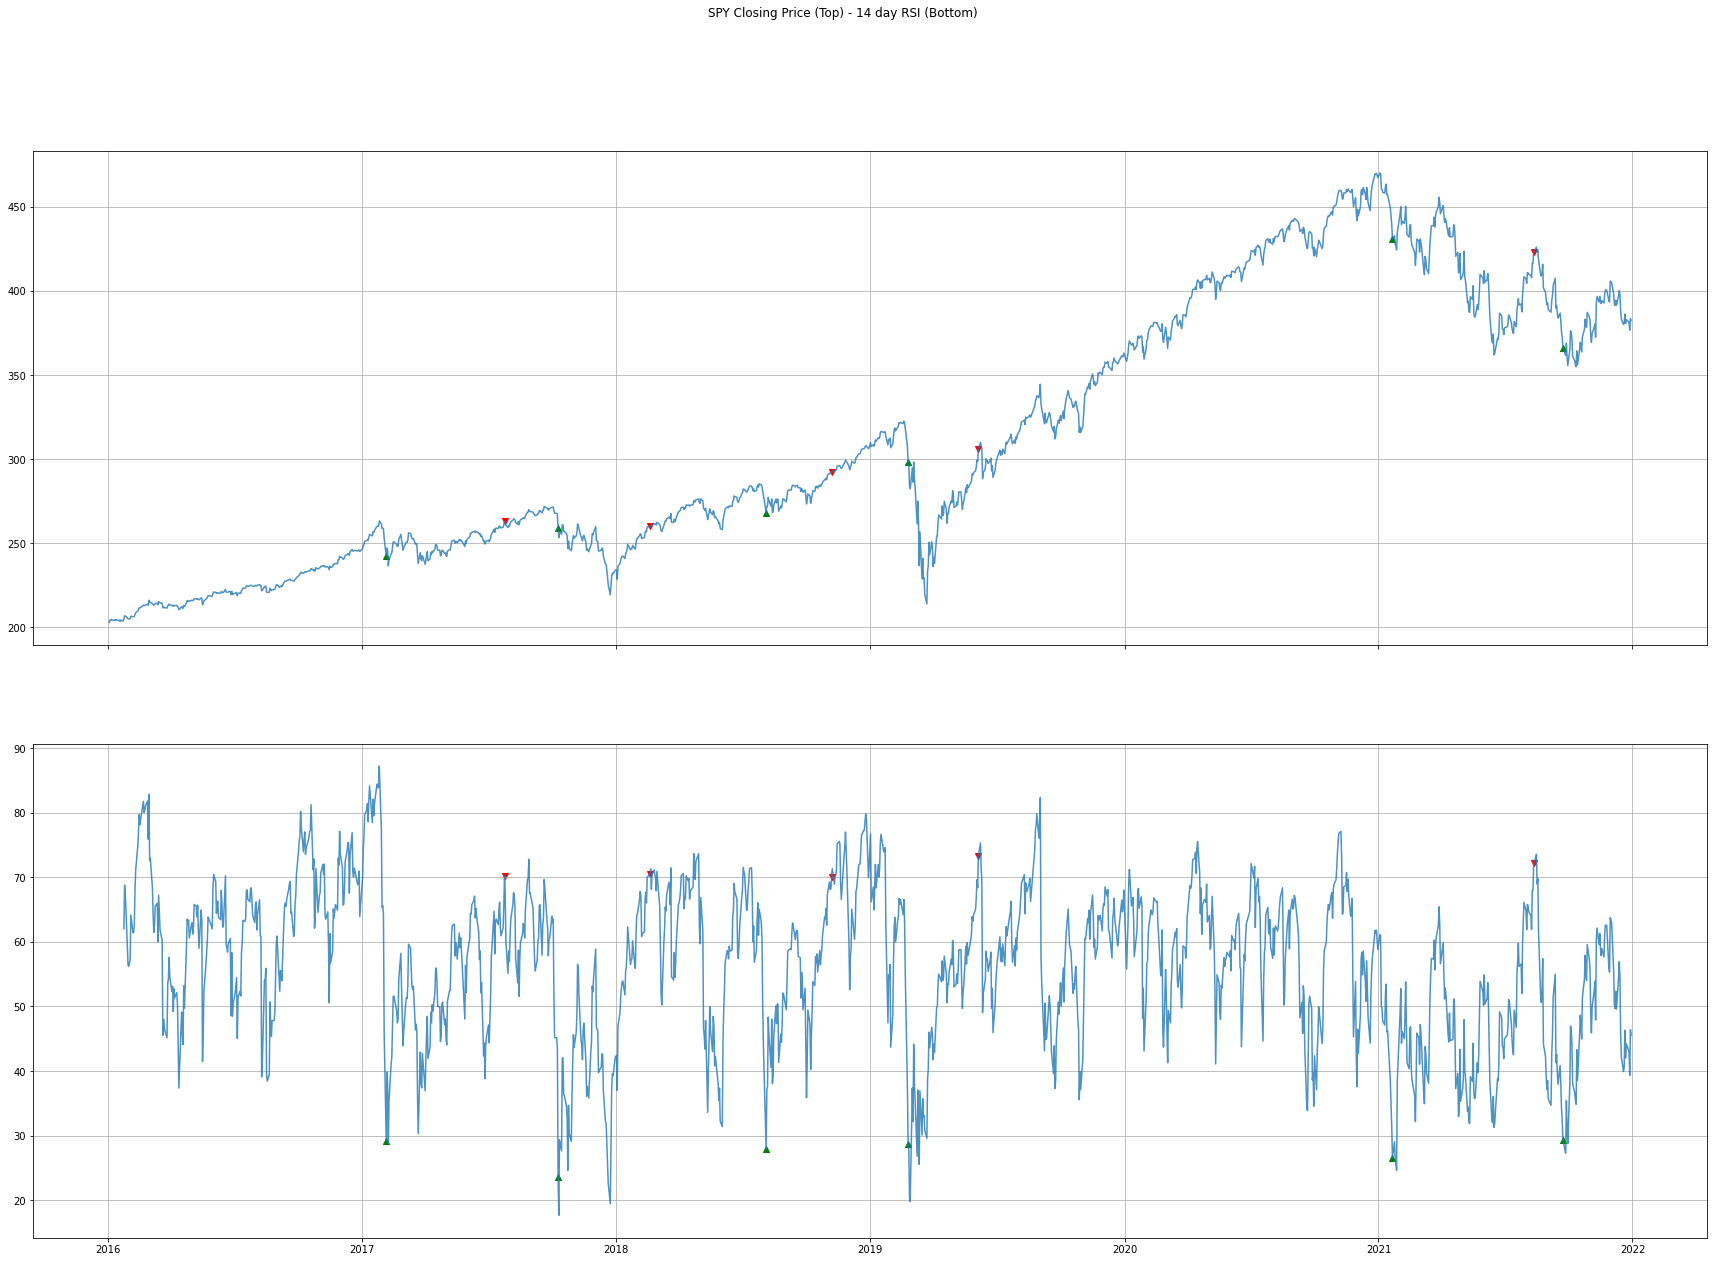

In [168]:
fig, axes = plt.subplots(2, sharex=True, figsize=(30, 20))
fig.suptitle('SPY Closing Price (Top) - 14 day RSI (Bottom)')

axes[0].scatter(
  spy_rsi_strat.index, 
  spy_rsi_strat['Buy Signal'], 
  color='green',
  marker='^',
  alpha=1
)

axes[0].scatter(
  spy_rsi_strat.index,
  spy_rsi_strat['Sell Signal'],
  color='red',
  marker='v',
  alpha=1
)

axes[0].plot(spy_rsi_strat['SPY'], alpha=0.8)
axes[0].grid()

axes[1].scatter(
  spy_rsi_strat.index, 
  spy_rsi_strat['Buy RSI'], 
  color='green',
  marker='^',
  alpha=1
)

axes[1].scatter(
  spy_rsi_strat.index,
  spy_rsi_strat['Sell RSI'],
  color='red',
  marker='v',
  alpha=1
)

axes[1].plot(spy_rsi_strat['RSI'], alpha=0.8)
axes[1].grid()
